In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

def cost_function(x,y,w,b):           #This function calculates the cost value 
    m=x.shape[1]
    z=np.dot(w.T,x)+b
    dz=z-y
    cost=1.0/m*np.sum(np.power(dz,2),axis=1)
    return cost

In [4]:
def linear_regression(x,y,alpha):
    cost_values=[]                     #cost_values will store cost values at each iteration
    w=np.random.rand(x.shape[0],1)     
    b=1
    m=x.shape[1]
    temp_cost=cost_function(x,y,w,b)
    cost_values.append(temp_cost)
    cost_change=1
    while(cost_change>0.0001):         # Gradient Descent 
        z=np.dot(w.T,x)+b
        dz=z-y
        dw=1.0/m*np.dot(x,dz.T)
        db=1.0/m*np.sum(dz)
        w=w-alpha*dw
        b=b-alpha*db
        cost=cost_function(x,y,w,b)
        cost_values.append(cost)
        cost_change=np.absolute(temp_cost-cost)
        temp_cost=cost

    plt.plot(cost_values)     # plotting the cost function
    plt.ylabel('cost function')
    plt.xlabel('no. of iterations')
    plt.show()
    return w,b

In [5]:
def prediction(x,w,b):        #This funtion will be used to predict on new data
    z=np.dot(w.T,x)+b
    return z

In [6]:
def r_2(x,y):                 # This function calculate R-squared score
    y_mean=y.mean()
    tss=np.sum((y-y_mean)**2,axis=1)
    w=predicted_w
    b=predicted_b
    z=np.dot(w.T,x)+b
    rss=np.sum(np.power((z-y),2),axis=1)
    r_squared=1-(rss/tss)
    return r_squared

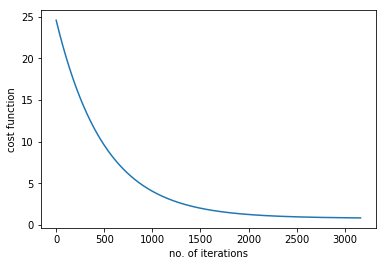

('weights :', array([[ 0.6016387 ],
       [-0.06003197],
       [ 0.29468158],
       [ 0.90312506],
       [ 0.14425203],
       [ 0.68030725],
       [ 0.28532257],
       [ 0.43913594],
       [ 0.5083758 ],
       [ 0.55655593],
       [ 0.5018649 ]]))
('bias :', 5.666259130470995)
('mean squared error for train data :', 0.8403054320745649)
('mean squared error for test data :', 0.11698625842491991)
('R squared on training :', -0.015119167324457727)
('R squared on test', -0.08162731307047899)


In [7]:
# Normalizing the data , dividing into train and test
train=pd.read_csv("winequality-white.csv",delimiter=";")
m=train.shape[0]
y=train.quality
x=train.drop(["quality"],axis=1)
x_range=x.max()-x.min()
x=(x-x.mean())/x_range
x_train=x.iloc[0:4000]
x_train=x_train.T.values
y_train=y.iloc[0:4000]
y_train=y_train.values.reshape(4000,1)
y_train=y_train.T
x_test=x.iloc[4000:]
x_test=x_test.T.values
y_test=y.iloc[4000:]
y_test=y_test.values.reshape(898,1)
y_test=y_test.T

predicted_w,predicted_b=linear_regression(x_train,y_train,alpha=0.001) # weights and bias is calculated 
print("weights :",predicted_w)
print("bias :",predicted_b)

print("mean squared error for train data :",cost_function(x_train,y_train,predicted_w,predicted_b)[0])

y_pred=prediction(x_test,predicted_w,predicted_b)

print("mean squared error for test data :",1.0/m*np.sum(np.power(y_pred-y_test,2),axis=1)[0])

print("R squared on training :",r_2(x_train,y_train)[0])
print("R squared on test" ,r_2(x_test,y_test)[0])